### Lab 7:  Convolutional Neural Networks

(c) Peter Samoaa

### CASE STUDY: FASHION CLASS CLASSIFICATION 


The global fashion industry is valued at three trillion dollars and accounts for two percent of the world's GDP.
The fashion industry is undergoing a dramatic transformation by adopting new computer vision and machine learning and deep learning techniques. In this case study, we will look at a hypothetical situation, will assume that a fashion retailer hired you to build a virtual stylist assistant that looks at customer Instagram and Facebook images and classifies what fashion category they are wearing, either bags, dresses and pants. 
The virtual assistant can help the retailer detect and forecast fashion trends and launch targeted marketing campaigns. in this study, we're going to use the fashion MNIST data. It's a dataset that contains images of bags, shoes and dresses and we're asking the deep network to classify the images into ten classes. 


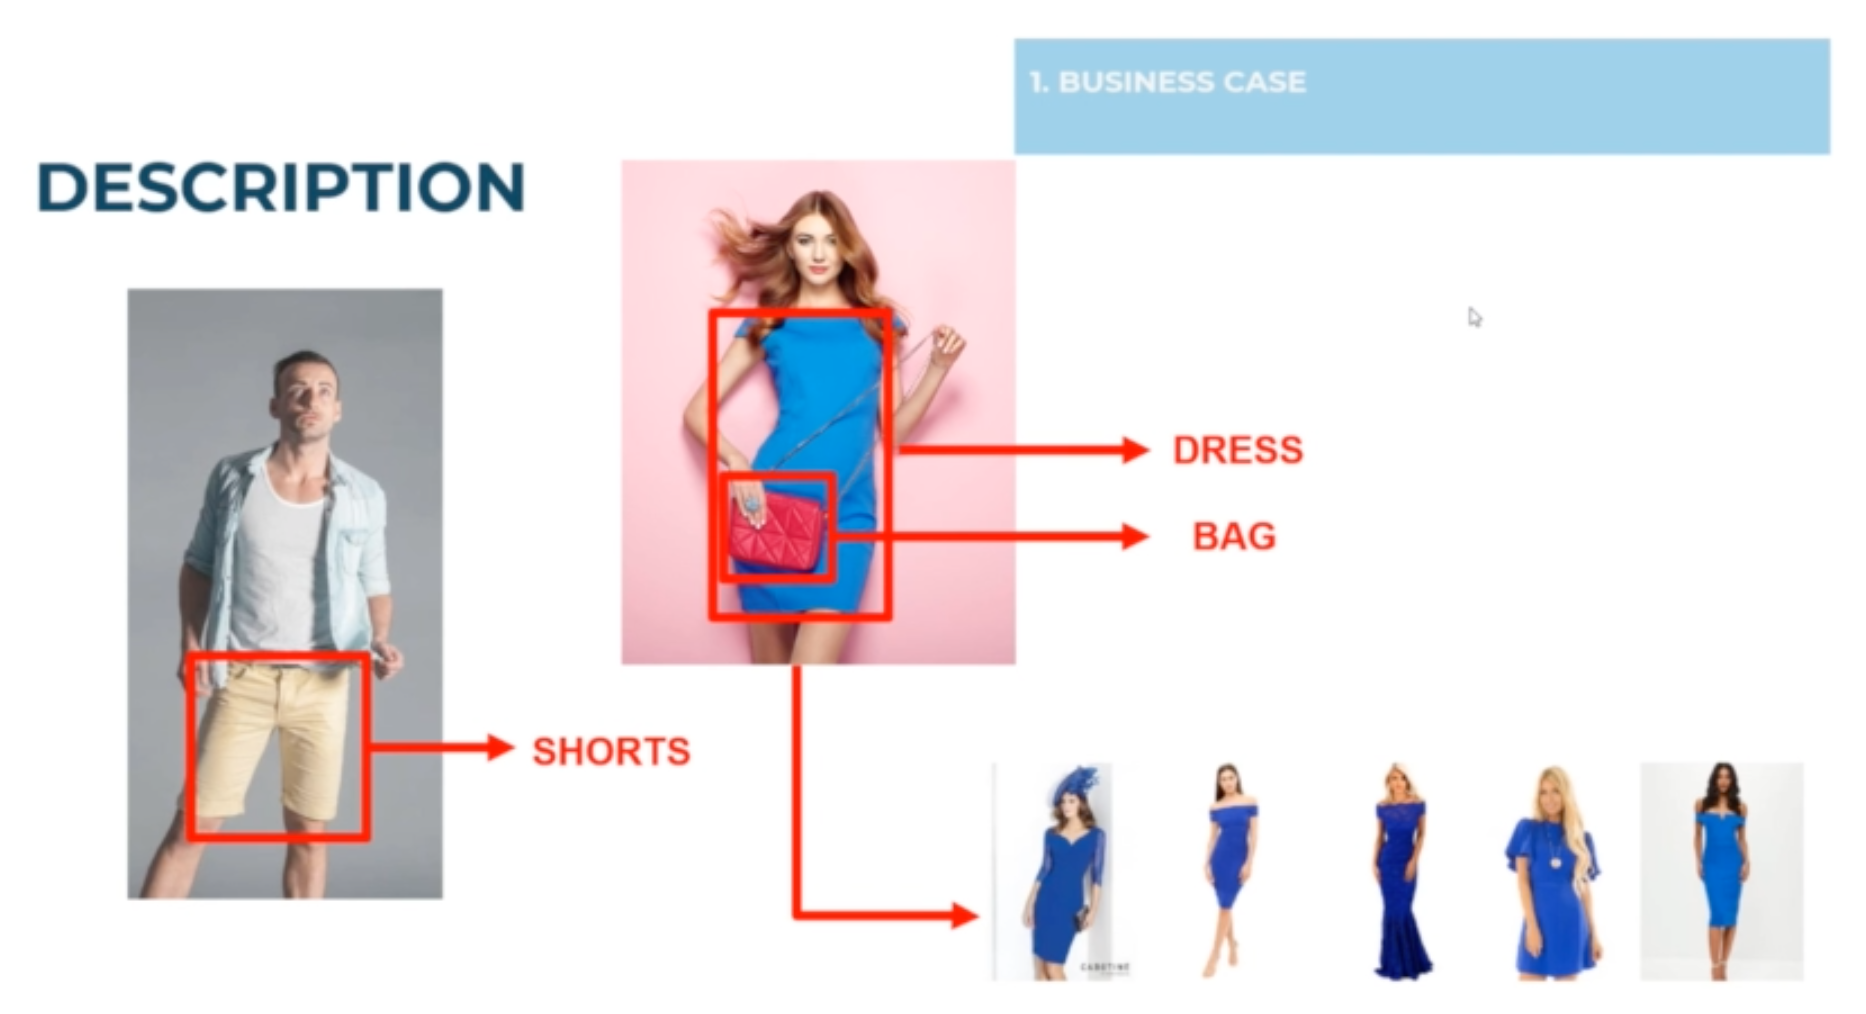

Eventually we wanted to build kind of an app or a model that can look at images and can tell us exactly what category in this image. Is it like a short is it a bag? Is it like a hat and so on. 
So we wanted to build kind of artificial intelligence based deep learning model that can classify images into different categories or different classes. 

# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

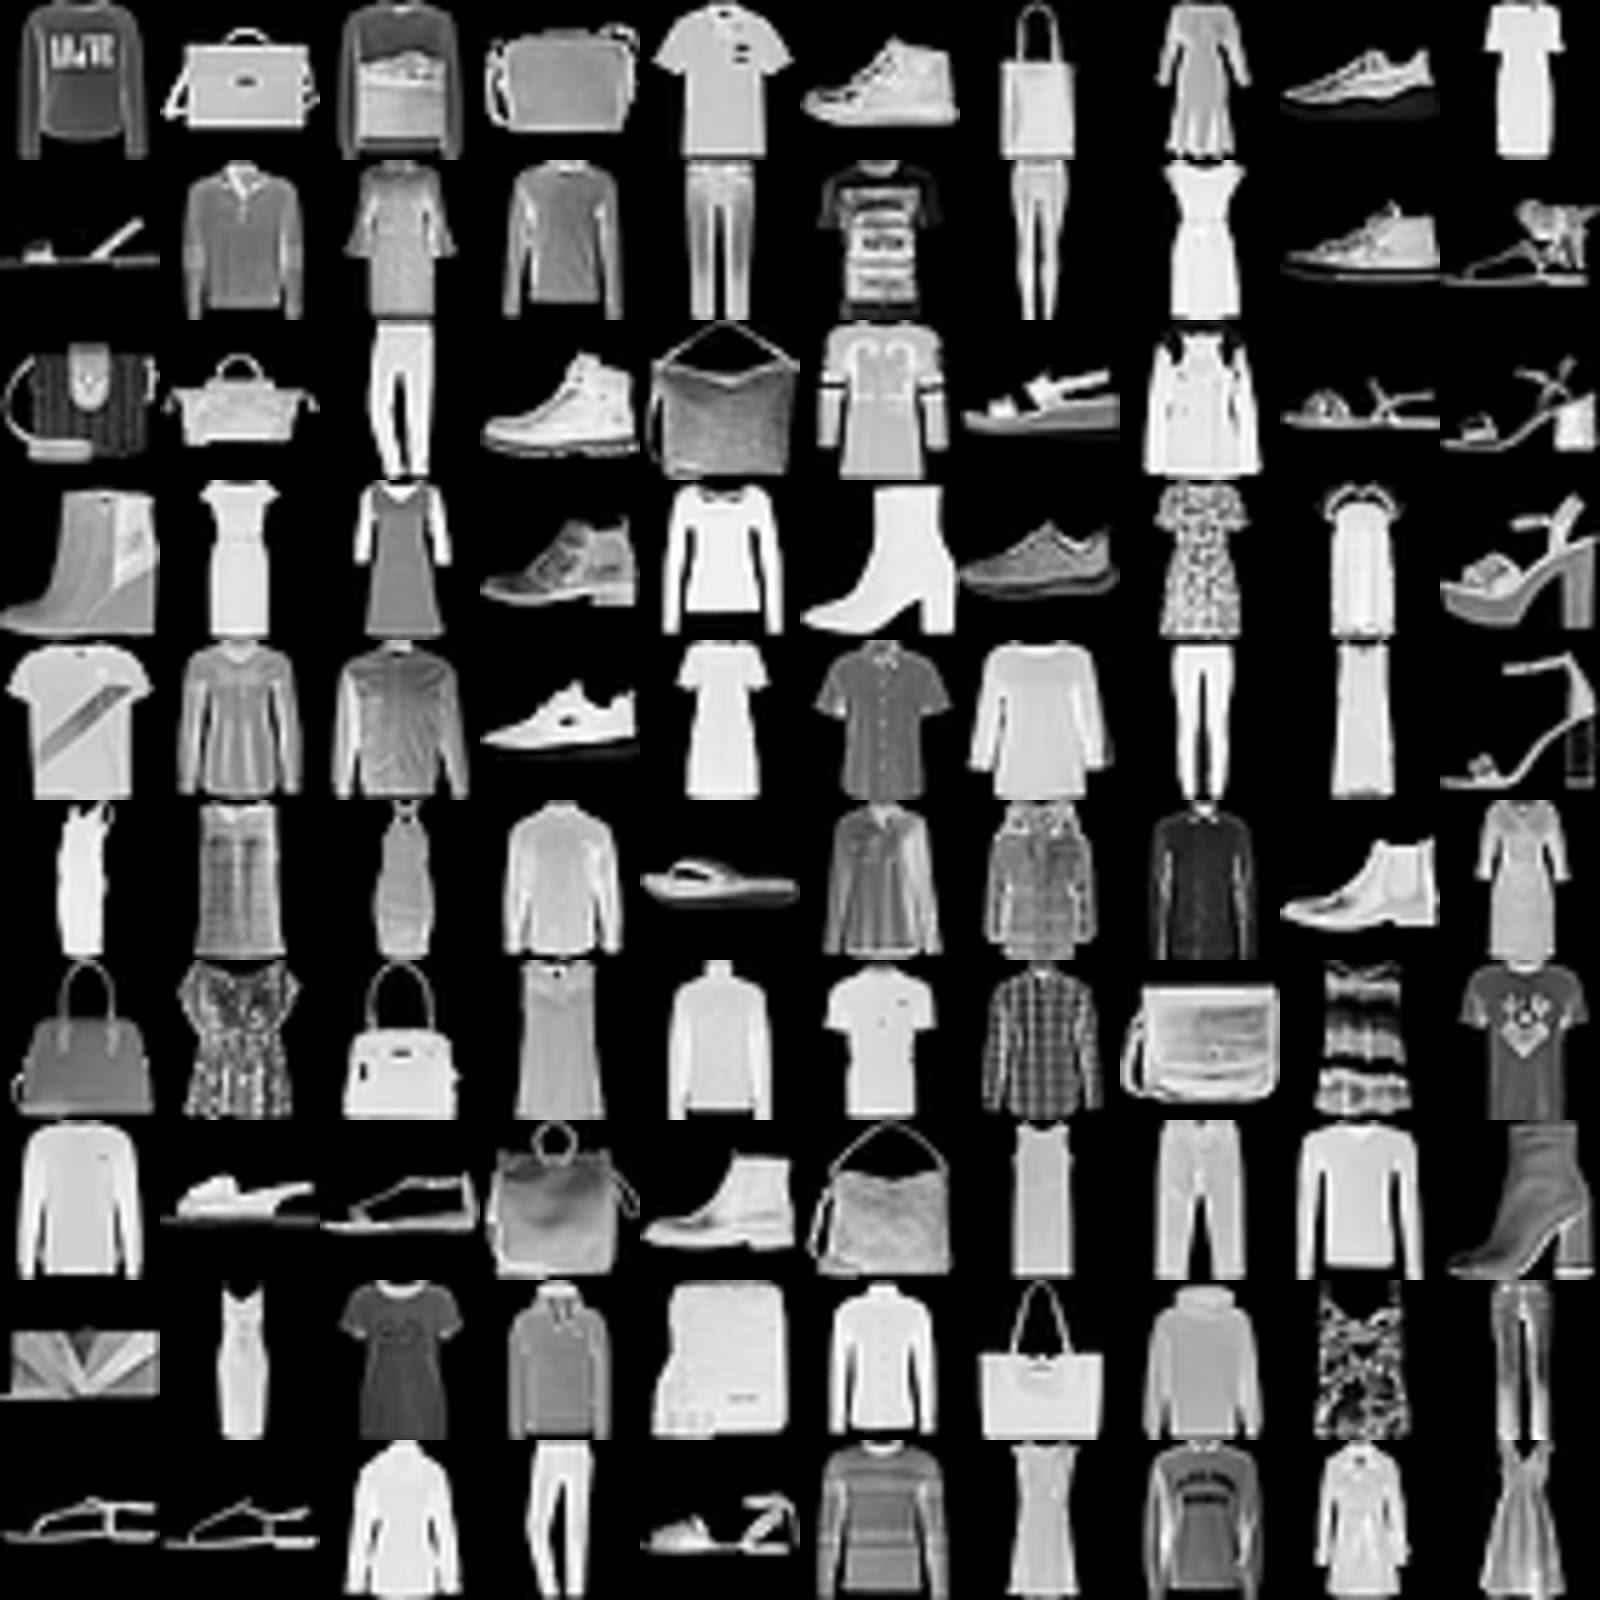


# STEP #2: IMPORTING DATA

In [130]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

In [131]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('input/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('input/fashion-mnist_test.csv', sep = ',')

# STEP #3: VISUALIZATION OF THE DATASET  

In [132]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
# Let's view the head of the testing dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# Let's view the last elements in the testing dataset
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [136]:
fashion_train_df.shape

(60000, 785)

In [137]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [138]:
training.shape

(60000, 785)

In [139]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [140]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

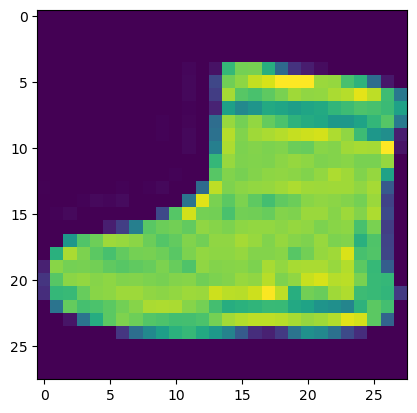

In [141]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

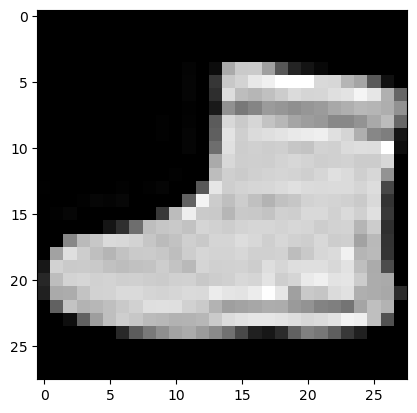

In [142]:
plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image



# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [143]:
label = training[i,0]
label


9.0

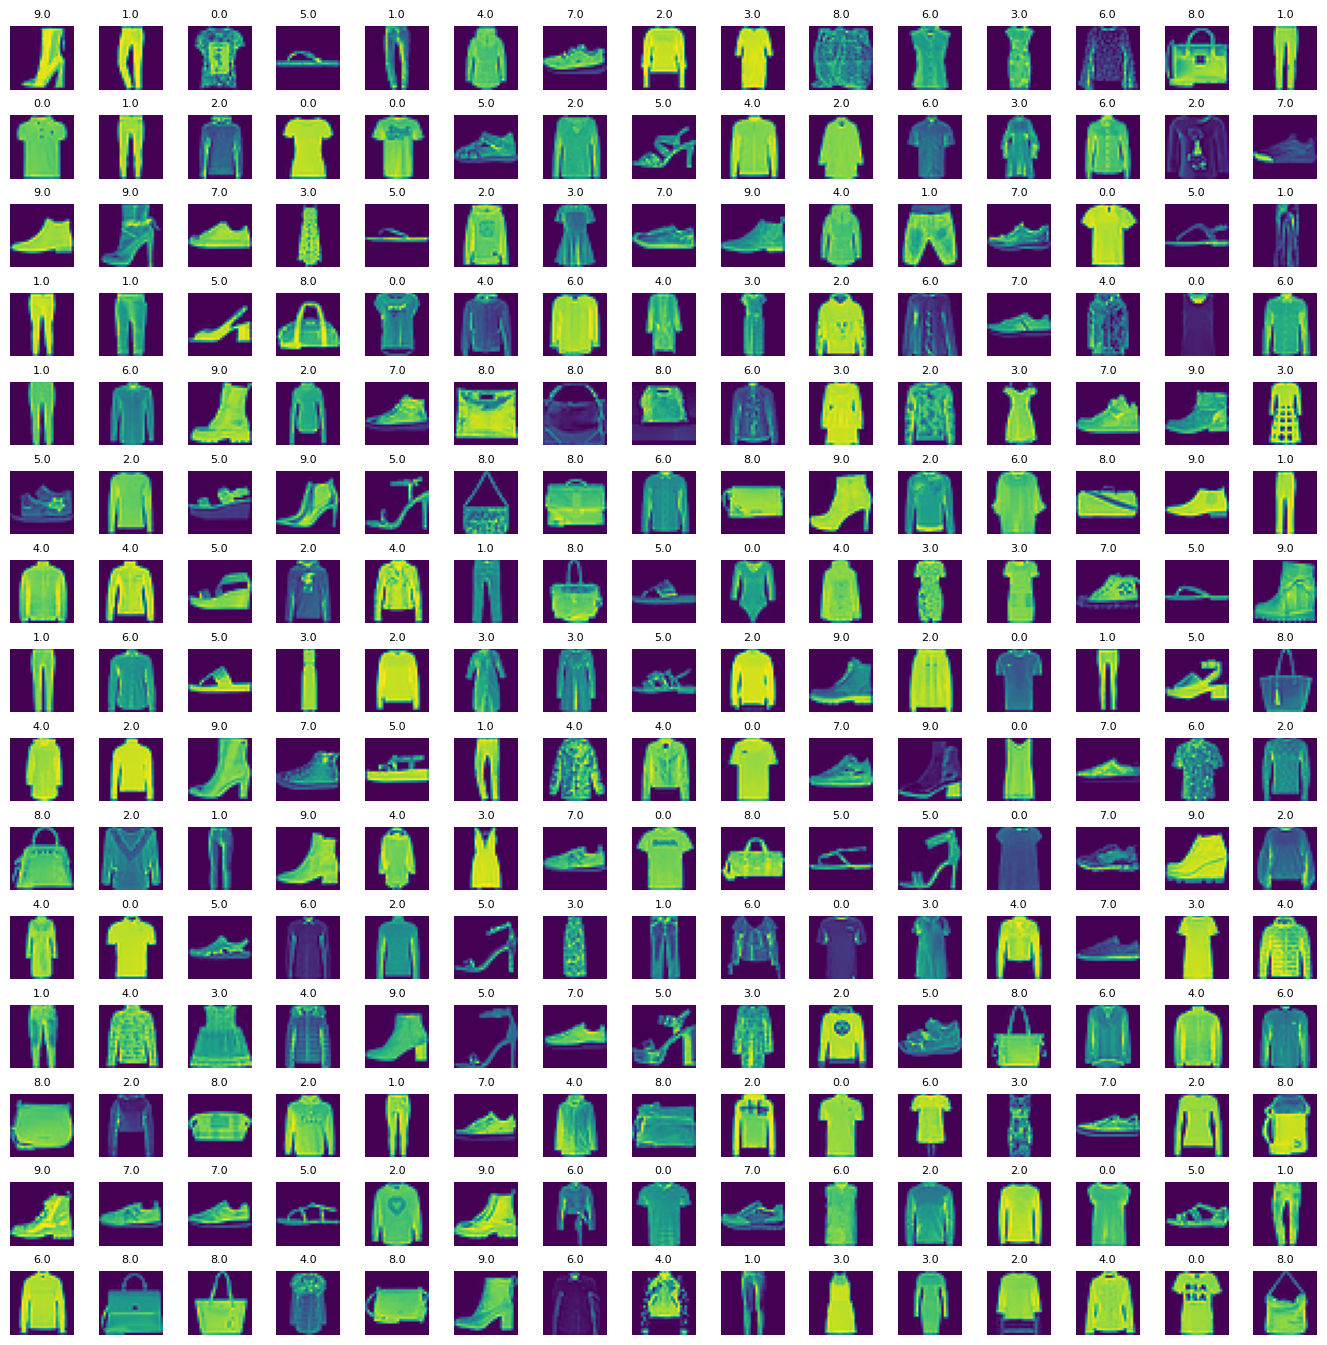

In [144]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off') # just to avoid showing the pixels around the images because we gonna present many images

plt.subplots_adjust(hspace=0.4) # to be able to view the data 

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

# STEP #4: TRAINING THE MODEL

In [165]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [166]:
from sklearn.model_selection import train_test_split
# validation dataset that might used to help the model to generalize
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [167]:
X_train.shape

(48000, 784)

In [168]:
y_train.shape

(48000,)

In [169]:
# * unpack the tuple. Reshape the data in a form that CNN can accept 
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [170]:
X_train.shape

(48000, 28, 28, 1)

In [171]:
X_test.shape

(10000, 28, 28, 1)

In [172]:
X_validate.shape

(12000, 28, 28, 1)

In [175]:
import keras # open source Neural network library madke our life much easier


y_train = to_categorical(y_train, num_classes=10)
y_validate = to_categorical(y_validate, num_classes=10)


In [154]:
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



In [177]:
# build your CNN model using keras 

# 1. Initialize your model 
cnn_model = Sequential()

# 2. Add Convolutional layer
cnn_model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))

# 3. Pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# 4. Flattening 
cnn_model.add(Flatten())

# 5. Dense layer
cnn_model.add(Dense(units=32, activation='relu'))

# 6. Output layer (10 categories for classification)
cnn_model.add(Dense(units=10, activation='softmax'))

# 7. Compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# 8. Training parameters
epochs = 50
batch_size = 5

# 9. Train the model using the training and validation set
history = cnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_validate, y_validate))


Epoch 1/50


c:\Users\QRZ\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.8050 - loss: 0.5426 - val_accuracy: 0.8896 - val_loss: 0.3059
Epoch 2/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8936 - loss: 0.2927 - val_accuracy: 0.8946 - val_loss: 0.2873
Epoch 3/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.9137 - loss: 0.2401 - val_accuracy: 0.9057 - val_loss: 0.2645
Epoch 4/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.9235 - loss: 0.2063 - val_accuracy: 0.9086 - val_loss: 0.2599
Epoch 5/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9333 - loss: 0.1792 - val_accuracy: 0.9074 - val_loss: 0.2804
Epoch 6/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9415 - loss: 0.1580 - val_accuracy: 0.8972 - val_loss: 0.3178
Epoch 7/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9469 - loss: 0.1456 - val_accuracy: 0.9084 - val_loss: 0.2867
Epoch 8/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9555 - loss: 0.1243 - val

In [156]:
# use sparse_categorical_crossentropy for the loss function and accuracy for the metrics of accuracy 


# STEP #5: EVALUATING THE MODEL

In [188]:

# Predict the test set
y_pred = cnn_model.predict(X_test)

# Convert probabilities to predicted classes
predicted_classes = np.argmax(np.round(y_pred), axis=1)

# Evaluate the model on the test set
evaluation = cnn_model.evaluate(X_test, y_test, verbose=1)

# Print test accuracy and loss
print('Test Accuracy : {:.3f}'.format(evaluation[1]))
print('Test Loss : {:.3f}'.format(evaluation[0]))
# 2. compare the validation accuracy of the last epoch and test accuracy and explain in your words why they are differnt. 

 # The 

# Q. Discuss how to enhance the performance of the model and explain in your words why that help and how much ?!
# hint: update the architecture by adding dropout regularization 

# 3. hint: use the confusion matrix for that 


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


ValueError: Cannot take the length of shape with unknown rank.

NameError: name 'predicted_classes' is not defined

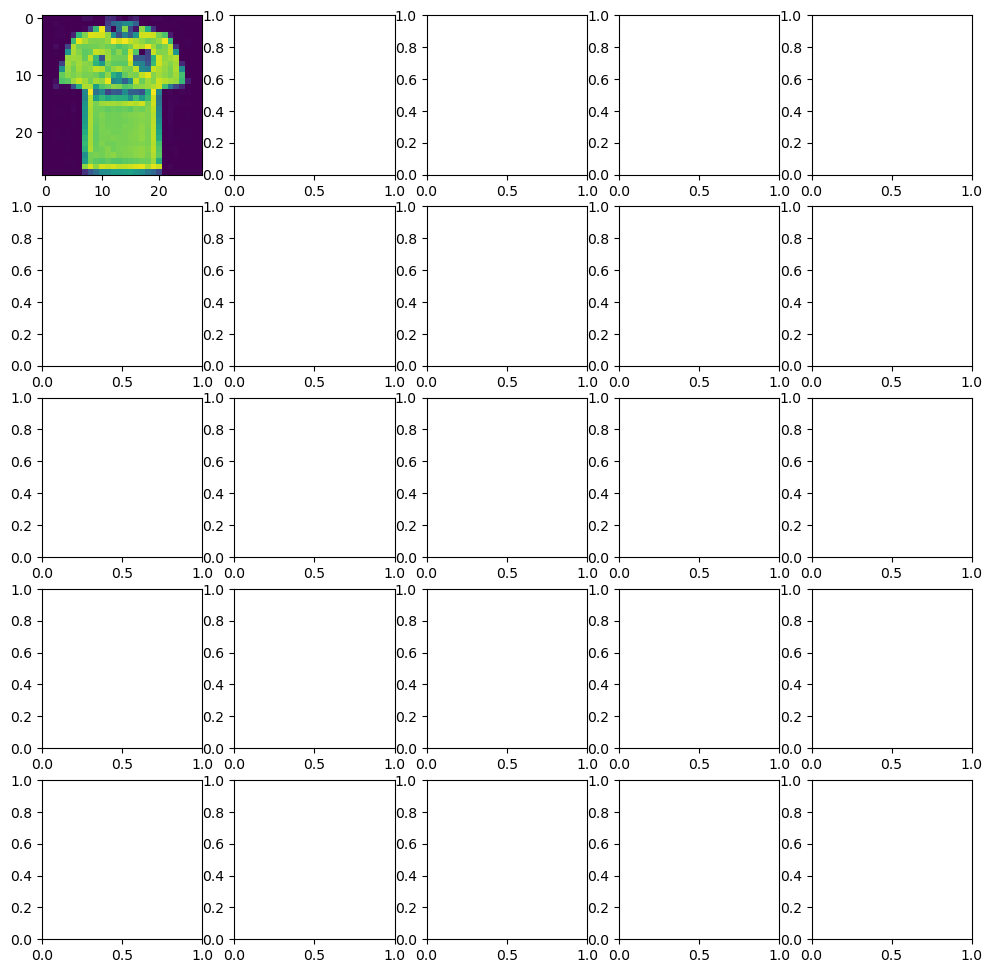

In [158]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


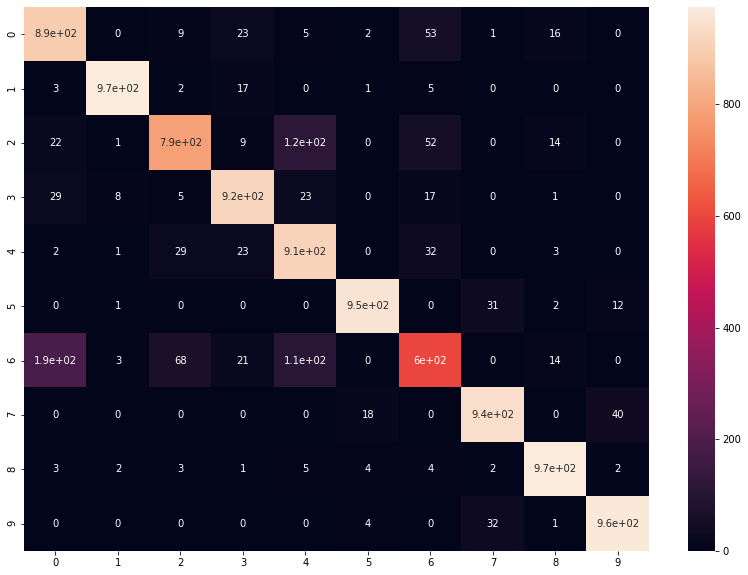

In [33]:
from sklearn.metrics import confusion_matrix
# use seaborn library to plot the confusion matrix 

# Sum the diagonal element to get the total true correct values

In [34]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.89      0.83      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.87      0.79      0.83      1000
     Class 3       0.91      0.92      0.91      1000
     Class 4       0.78      0.91      0.84      1000
     Class 5       0.97      0.95      0.96      1000
     Class 6       0.79      0.60      0.68      1000
     Class 7       0.93      0.94      0.94      1000
     Class 8       0.95      0.97      0.96      1000
     Class 9       0.95      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

